# STELLAR CLASSIFICATION

This project aims to classify cosmic entities into their appropriate classes using the [Stellar Classification Dataset - SDSS17](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17) from Kaggle. The dataset contains observations taken by the [Sloan Digital Sky Survey (SDSS)](https://www.sdss.org/) and provides valuable information about stars, galaxies, and quasars.

By employing machine learning techniques, we will develop a classification model that can accurately predict the class of new cosmic entities based on their features. Through feature engineering, exploratory data analysis, and the implementation of various classification algorithms, we will strive to achieve high-performance predictions. The successful outcome of this project will contribute to our understanding of the universe and aid in astronomical research.

The algorithms which I'll be using are:-
```
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Decision Tree
- Gaussian Naive Bayes (GaussianNB)
- Random Forest
- XGBoost
```

I will compare these algorithms based on their accuracy scores to find the best one. For algorithms with hyperparameters that can be adjusted, I will try different combinations of hyperparameter values and select the one that gives the highest accuracy. Once I have the best hyperparameter values for each algorithm, I will compare their accuracy scores to determine which algorithm performs the best overall. This way, I can identify the algorithm that provides the highest accuracy on the given dataset.

---

# **Content:**
The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

1. obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2. alpha = Right Ascension angle (at J2000 epoch)
3. delta = Declination angle (at J2000 epoch)
4. u = Ultraviolet filter in the photometric system
5. g = Green filter in the photometric system
6. r = Red filter in the photometric system
7. i = Near Infrared filter in the photometric system
8. z = Infrared filter in the photometric system
9. run_ID = Run Number used to identify the specific scan
10. rereun_ID = Rerun Number to specify how the image was processed
11. cam_col = Camera column to identify the scanline within the run
12. field_ID = Field number to identify each field
13. spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
14. class = object class (galaxy, star or quasar object)
15. redshift = redshift value based on the increase in wavelength
16. plate = plate ID, identifies each plate in SDSS
17. MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
18. fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

# **Algorithhms in Project:**


1.   Logistic Regression
2.   K-Nearest Neighbors (KNN)
3.   Decision Tree
4.   Gaussian Naive Bayes (GaussianNB)
5.   Random Forest
6.   XGBoost



# **Importing Libraries(Khai báo thư viện):**

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Warning ignore libraries to be added

In [29]:
from warnings import filterwarnings
filterwarnings(action='ignore')

---
---
<br>

# **Creating dataframe(Khởi tạo khung dữ liệu):**

In [30]:
df=pd.read_csv('/content/star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [31]:
df.shape

(100000, 18)

---
---
<br>

# **EDA (Exploratory Data Analysis)(Phân tích dữ liệu thăm dò):**

In [32]:
#Kiểm tra giá trị còn thiếu trong Dataset
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

```Since the target variable, i.e., the 'class' column is of non-numeric type, we'll have to perform encoding.```

In [34]:
#Tính các dữ liệu cơ bản(trung bình, trung vị, độ lệch chuẩn...)
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [35]:
df['class'].nunique()

3

In [36]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [37]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

```Since there is a class imbalance in the dataset, we'll address this issue through resampling techniques.```

---
---
<br>

# **Data Visualization(Trực quan hóa dữ liệu):**

In [38]:
sns.set(style='darkgrid', palette='dark')

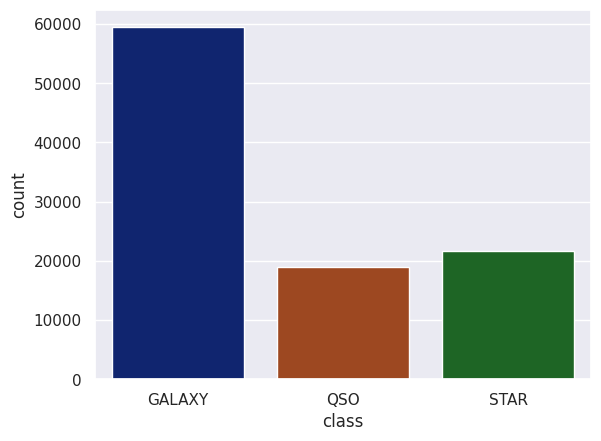

In [39]:
sns.countplot(x = df['class'])
plt.show()

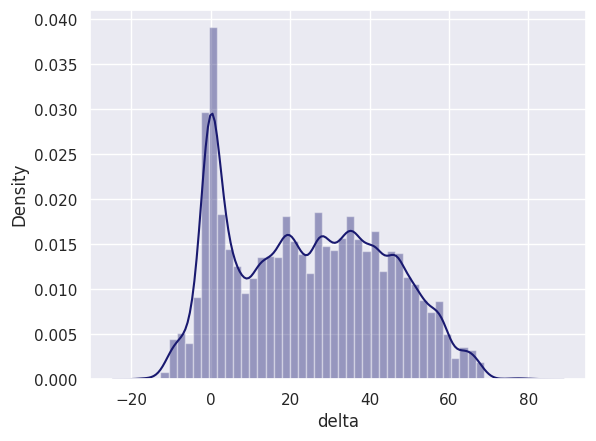

In [40]:


sns.distplot(df['delta'], color="midnightblue")
plt.show()


<Axes: xlabel='redshift', ylabel='Density'>

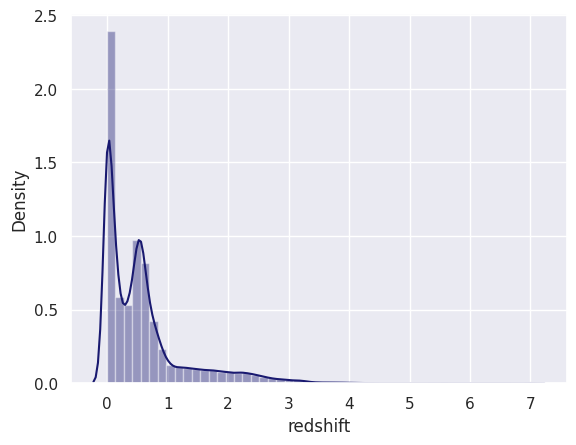

In [41]:
sns.distplot(df.redshift, color="midnightblue")

<Axes: xlabel='plate', ylabel='Density'>

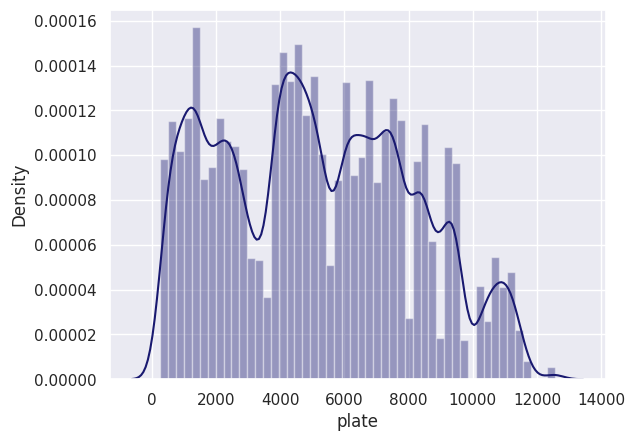

In [42]:
sns.distplot(df.plate, color="midnightblue")

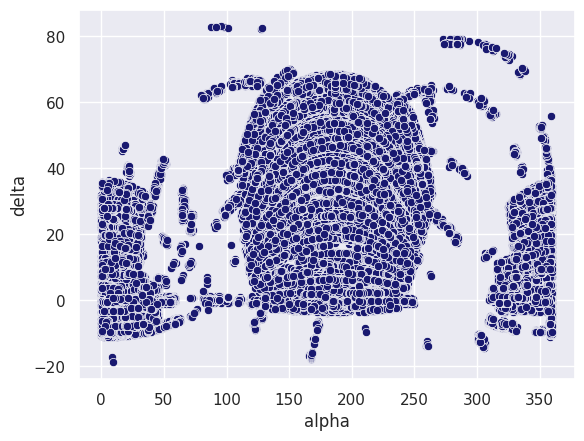

In [43]:
sns.scatterplot(x = df.alpha, y = df.delta, color="midnightblue")
plt.show()

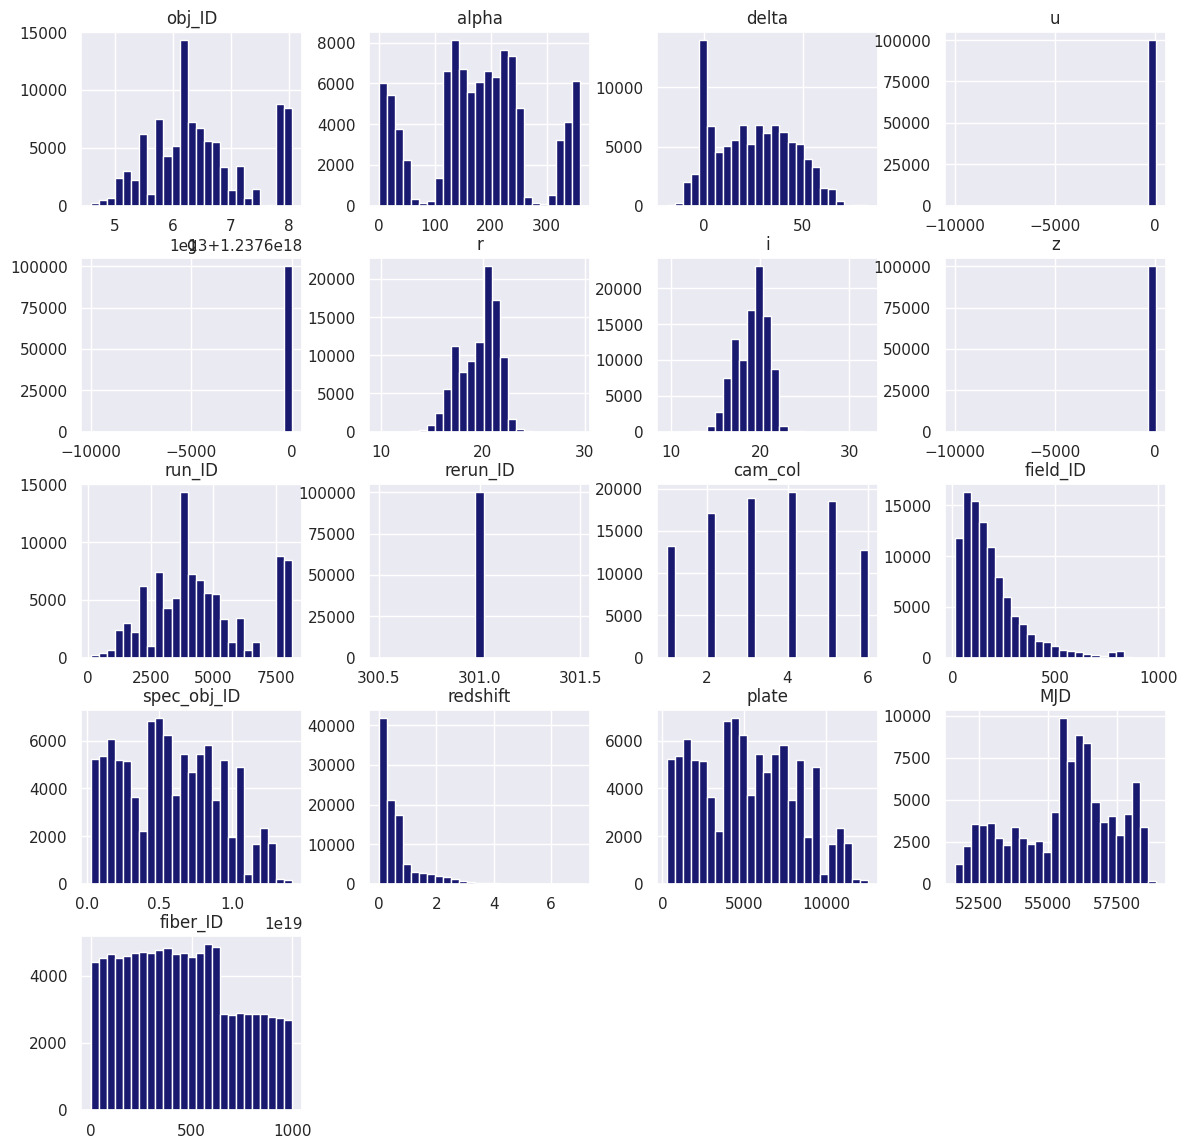

In [44]:
#.hist(): function in Pandas generates separate histograms for each numerical column, providing a visual
# representation of the distribution of values within those columns
df.hist(bins =25 , figsize= (14,14), color="midnightblue")
plt.show()

<Axes: >

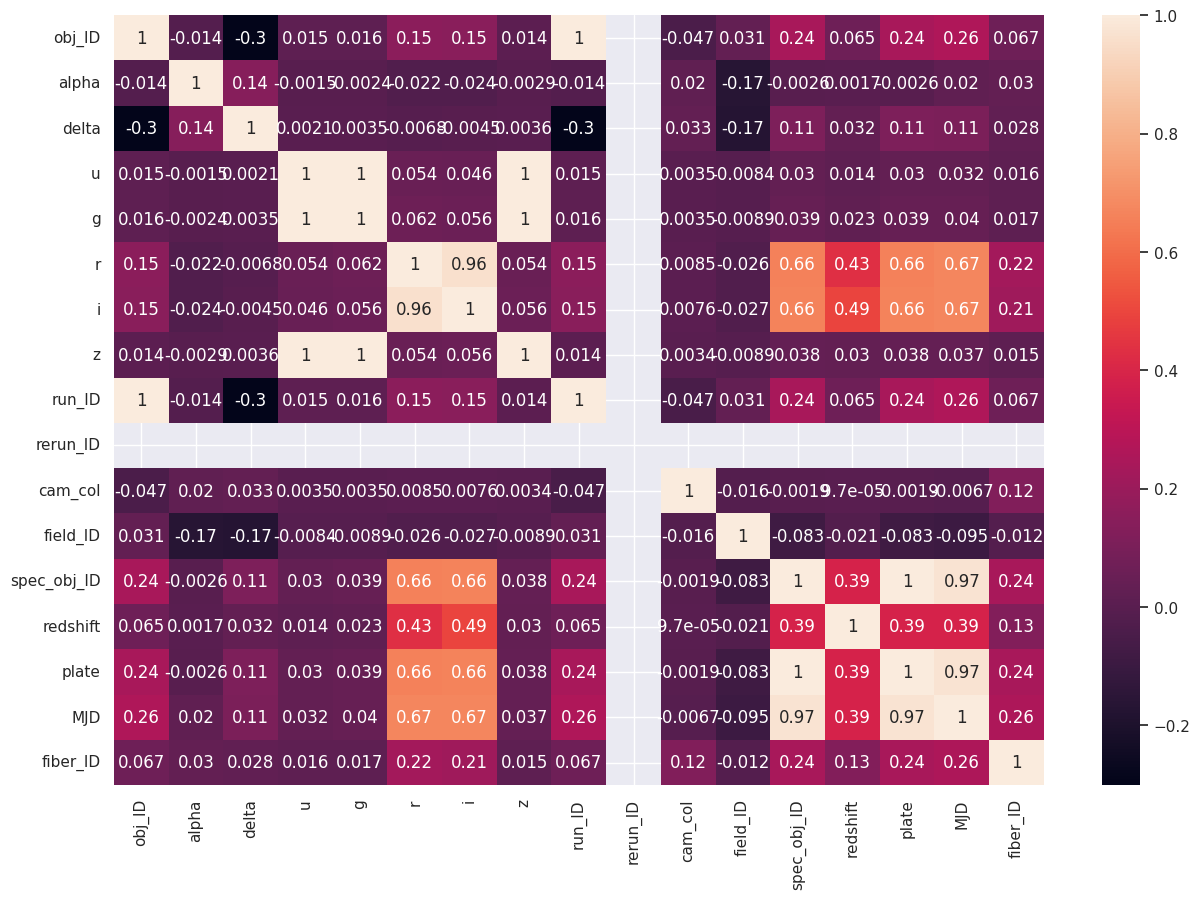

In [45]:
# Heatmap for expressing correlation
#Correlation Matrix
plt.figure(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr,annot=True)

---
---
<br>

# **Encoding(Mã hóa):**

In [46]:
# We can either do this, which doesn't involve encoding or we can perform encoding

# Assigning a new value to the 'class' column by using map
#df['class']=df['class'].map({'GALAXY':1,'STAR':0,'QSO':2})

In [47]:
# OR
# we can encode the data

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['class'] = LE.fit_transform(df['class'])

In [48]:
df['class'].value_counts()

0    59445
2    21594
1    18961
Name: class, dtype: int64

---
---
<br>

# **Feature Selection(Lựa chọn tính năng):**

In [49]:
X = df[['u', 'g', 'r', 'i', 'z', 'redshift', 'plate']]
X

,u,g,r,i,z,redshift,plate
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,6121
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,9374
99996,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,7626
99997,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,2764
99998,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,6751


In [50]:
y = df['class']
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: class, Length: 100000, dtype: int64

---
---
<br>

# Resampling

In [51]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 30, k_neighbors = 5)
X_res, y_res = sm.fit_resample(X, y)

In [52]:
y.value_counts()

0    59445
2    21594
1    18961
Name: class, dtype: int64

In [53]:
y_res.value_counts()

0    59445
1    59445
2    59445
Name: class, dtype: int64

---
---
<br>

# **Splitting Dataset(Phân chia tập dữ liệu):**

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state = 30)

---
---
<br>

# **Classification Algorithms(Thuật toán phân loại):**

In [55]:
# Creating the dataframe in which we'll store the accuracy scores of all the classification algorithms so we can choose the best one.

score_df = pd.DataFrame(columns=['Algorithm', 'Recall score'])

### **Linear Regression(Hồi quy tuyến tính):**

In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

from sklearn.metrics import recall_score
LR_score = recall_score(y_test, y_pred1, average='weighted')
print(LR_score)

0.9435671989951552


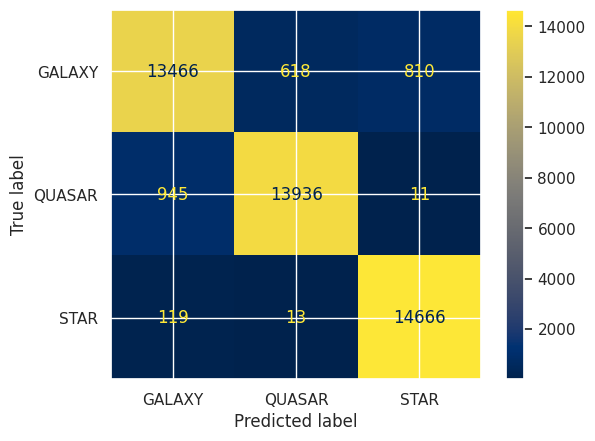

In [58]:
#Confusion Matrix
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
ConfusionMatrixDisplay.from_predictions(y_test, y_pred1, cmap = 'cividis',
                                        display_labels = ['GALAXY', 'QUASAR', 'STAR'])

In [60]:
# Adding recall_score of the algo to the dataframe

score_df = score_df.append({'Algorithm':'LogisticRegression', 'Recall score': LR_score}, ignore_index = True)
score_df

,Algorithm,Recall score
0,LogisticRegression,0.943567
1,LogisticRegression,0.943567


---

### **K-Nearest neighbors(K-Hàng xóm gần nhất):**

In [61]:
# Now, we'll create a dataframe where we'll store the recall score of the K Neighbors Classifier algorithm with different values of n_neighbors
# Then, we'll choose the maximum one and consider that as the recall score of the KNN algo. for further use

knn_df = pd.DataFrame(columns=['Neighbors','Recall score'])

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    y_pred2 = model.predict(X_test)
    knn_df = knn_df.append({'Neighbors':i, 'Recall score':recall_score(y_test, y_pred2, average='weighted')}, ignore_index=True)

    knn_df

In [63]:
knn_df = knn_df.sort_values(by='Recall score', ascending = False)
knn_df.head()

,Neighbors,Recall score
0,1.0,0.931051
2,3.0,0.914902
1,2.0,0.913579
3,4.0,0.905616
4,5.0,0.903777


From the above code cell, we can see that n_neighbors = 1 has the highest accuracy score out of all the values in the dataframe. So, for the final accuracy score of the KNN algo, we'll keep n_neighbors = 1.

In [64]:
# KNN algo for n_neighbors = 1

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)

from sklearn.metrics import recall_score
knn_score = recall_score(y_test, y_pred2, average='weighted')
print(knn_score)

0.9310514982953526


In [65]:
# Adding recall score of the algo to the dataframe

score_df = score_df.append({'Algorithm':'KNN', 'Recall score': knn_score}, ignore_index = True)
score_df

,Algorithm,Recall score
0,LogisticRegression,0.943567
1,LogisticRegression,0.943567
2,KNN,0.931051


---

### **Decision Tree(Cây quyết định):**

In [66]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 30)
model.fit(X_train, y_train)
y_pred3 = model.predict(X_test)

dtree_score = recall_score(y_test, y_pred3, average='weighted')
print(dtree_score)

0.9710658532208865


In [67]:
# Adding recall score of the algo to the dataframe

score_df = score_df.append({'Algorithm':'Decision Tree', 'Recall score':dtree_score}, ignore_index = True)
score_df

,Algorithm,Recall score
0,LogisticRegression,0.943567
1,LogisticRegression,0.943567
2,KNN,0.931051
3,Decision Tree,0.971066


---

### Gaussian Naive Bayes

In [80]:
#Khai báo thư viện GaussianNB từ sklearn.naive_bayes
from sklearn.naive_bayes import GaussianNB

#Tạo ra mô hình dữ liệu dựa trên tập dữ liệu huấn luyện đã chia
model = GaussianNB()
model.fit(X_train, y_train)

y_pred4 = model.predict(X_test)
#Kết quả dự đoán được tạo ra và đem so sánh với giá trị thực y_test để tìm ra độ chính xác
gnb_score = recall_score(y_test, y_pred4, average = 'weighted')
gnb_score

0.6041853579759555

In [69]:
# Adding accuracy score of the algo to the dataframe

score_df = score_df.append({'Algorithm':'GaussianNB', 'Recall score': gnb_score}, ignore_index = True)
score_df

,Algorithm,Recall score
0,LogisticRegression,0.943567
1,LogisticRegression,0.943567
2,KNN,0.931051
3,Decision Tree,0.971066
4,GaussianNB,0.604185


---

### **Random Forest(Rừng ngẫu nhiên):**

In [70]:
# Now, we'll create a dataframe where we'll store the recall score of the Random Forest Classifier algorithm with different values of n_estimators
# Then, we'll choose the maximum one and consider that as the recall score of the KNN algo. for further use

rf_df = pd.DataFrame(columns=['Estimators','Recall score'])

In [71]:
from sklearn.ensemble import RandomForestClassifier

for i in range(1,21):
    model = RandomForestClassifier(n_estimators = i, random_state = 30)
    model.fit(X_train, y_train)
    y_pred5 = model.predict(X_test)
    rf_df = rf_df.append({'Estimators':i, 'Recall score':recall_score(y_test, y_pred5, average = 'weighted')},
                         ignore_index = True)

rf_df

,Estimators,Recall score
0,1.0,0.966602
1,2.0,0.968374
2,3.0,0.977772
3,4.0,0.978221
4,5.0,0.979836
5,6.0,0.979970
6,7.0,0.980666
7,8.0,0.980688
8,9.0,0.981069
9,10.0,0.981316


In [72]:
rf_df = rf_df.sort_values(by='Recall score', ascending = False)
rf_df.head()

,Estimators,Recall score
17,18.0,0.982011
19,20.0,0.981967
15,16.0,0.981899
18,19.0,0.981810
14,15.0,0.981810


From the above code cell, we can see that n_estimators = 18 has the highest recall score out of all the values in the dataframe. So, for the final recall score of the Random Forest Classifier algo, we'll keep n_estimators = 18.

In [73]:
# Random Forest algo for n_estimators = 1
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 18, random_state = 30)
model.fit(X_train, y_train)
y_pred5 = model.predict(X_test)

from sklearn.metrics import recall_score
rf_score = recall_score(y_test, y_pred5, average = 'weighted')
rf_score

0.982011483940427

In [74]:
# Adding accuracy score of the algo to the dataframe

score_df = score_df.append({'Algorithm':'Random Forest', 'Recall score': rf_score}, ignore_index = True)
score_df

,Algorithm,Recall score
0,LogisticRegression,0.943567
1,LogisticRegression,0.943567
2,KNN,0.931051
3,Decision Tree,0.971066
4,GaussianNB,0.604185
5,Random Forest,0.982011


---

### XGBoost (Extreme Gradient Boosting)
```You might need to install xgboost in your system if it's not already installed.```

In [75]:
import xgboost as xgb
model = xgb.XGBClassifier(random_state = 30)
model.fit(X_train, y_train)
y_pred6 = model.predict(X_test)

from sklearn.metrics import recall_score
xgb_score = recall_score(y_test, y_pred6, average = 'weighted')
xgb_score

0.9802171182486991

In [76]:
# Adding recall score to the dataframe

score_df = score_df.append({'Algorithm':'XGBoost', 'Recall score':xgb_score}, ignore_index = True)
score_df

,Algorithm,Recall score
0,LogisticRegression,0.943567
1,LogisticRegression,0.943567
2,KNN,0.931051
3,Decision Tree,0.971066
4,GaussianNB,0.604185
5,Random Forest,0.982011
6,XGBoost,0.980217


---
---
<br>

# Top-performing model

In [77]:
score_df = score_df.set_index('Recall score')
score_df

,Algorithm
Recall score,
0.943567,LogisticRegression
0.943567,LogisticRegression
0.931051,KNN
0.971066,Decision Tree
0.604185,GaussianNB
0.982011,Random Forest
0.980217,XGBoost


In [78]:
score_df = score_df.sort_values(by = 'Recall score', ascending = False)
score_df

,Algorithm
Recall score,
0.982011,Random Forest
0.980217,XGBoost
0.971066,Decision Tree
0.943567,LogisticRegression
0.943567,LogisticRegression
0.931051,KNN
0.604185,GaussianNB


---

After careful analysis and evaluation of different models, the Random Forest algorithm emerged as the top-performing model in terms of predictive accuracy and performance. <br><br>
Therefore, I have decided to utilize the **```Random Forest classifier```** for training my model.

---
---